<a href="https://colab.research.google.com/github/DharaVivek/NeuroNexus/blob/main/task_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 4
SPAM SMS DETECTION

 Step 1 : Import Necessary Libraries:

 Start by importing the libraries you'll need, such as pandas, numpy, nltk, and scikit-learn. These libraries will help you handle and analyze the data effectively.

In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Step 2 : Load and Explore the Data:
Load your spam dataset using pandas and explore it to understand its structure. This step is crucial for gaining insights into your data.

In [2]:
with open('/content/spam.csv', 'r', encoding='ISO-8859-1') as file:
    first_row = file.readline().strip()
    columns_with_data = [column.strip() for column in first_row.split(',') if column.strip() != '']

data = pd.read_csv('/content/spam.csv', usecols=columns_with_data, encoding='ISO-8859-1')

print(data.head())


     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


Step 3 : Data Preprocessing:
Text data needs preprocessing, including removing special characters, converting to lowercase, and tokenization. You'll also need to label encode the target variable.

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['label'] = le.fit_transform(data['v1'])

data['v2'] = data['v2'].str.lower()
data['v2'] = data['v2'].str.replace('[^a-zA-Z]', ' ', regex=True)
data['v2'] = data['v2'].str.split()



Step 4 : Text Vectorization:
Convert the text data into numerical features using techniques like Count Vectorization or TF-IDF Vectorization. This step is essential for machine learning algorithms.

In [4]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data['v2'].apply(lambda x: ' '.join(x)))


Step 5 : Split the Data: Split your dataset into training and testing sets to evaluate the model's performance.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, data['v1'], test_size=0.2, random_state=42)


Step 6 : Train a Model
Use a suitable NLP model like Multinomial Naive Bayes to train your dataset. This model is commonly used for text classification tasks.

In [6]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

Step 7 : Evaluate the Model:
Assess your model's performance by predicting on the test set and calculating relevant metrics like accuracy, precision, recall, and F1-score.

In [7]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{confusion}')
print(f'Classification Report: \n{report}')


Accuracy: 0.9668161434977578
Confusion Matrix: 
[[965   0]
 [ 37 113]]
Classification Report: 
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



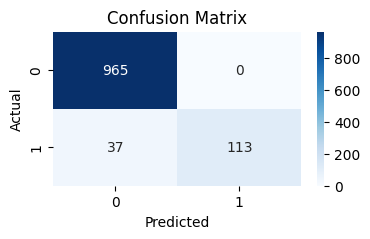

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


The model achieves a high accuracy of approximately 96.7%, indicating its ability to correctly classify messages as either "ham" (non-spam) or "spam." It has a strong precision of 1.00 for "spam," which means that when it predicts a message as spam, it is almost always correct. However, it has a lower recall of 0.75 for "spam," suggesting that it misses some spam messages.